In [1]:
from utils import jupyter_style

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
jupyter_style()

In [2]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Tesseract-OCR'

## Mosex

In [3]:
from mosex import mosex
iis=mosex()

In [ ]:
#http://iss.moex.com/iss/securities.json
#from pytesseract.pytesseract import tesseract_cmd 

### Security specification

In [ ]:
iis.get_security_spec('MOEX')

### Index list

In [ ]:
index_list=iis.get_index_list()
index_list.head(3)

In [ ]:
print(max(index_list.till))
index_list[(index_list.actual_flg==True)&(index_list.dollar==True)]

  ## Таблицы
  ### Stock_indices
  **поле** | **комментарий**
   ------------- | -------------|
 uk| ключ(PK)
uk_descr| расшифрока индекса
source_link|источник данных(web)
 bloomberg_id| код Bloomberg
reuters_id| код Reuters
 isin_id| код ISIN
calc_type| тип индекса,например:Ценовой, взвешенный по капитализации 
 calc_period| Время расчета (Московское время)
 periodicity|Периодичность расчета Индекса
 fist_calc|Начало расчета
 firs_value|Начальное значение
 weight_limit|Ограничение на вес одного эмитента
 update_campanies_list|Сроки изменения списка индекса
 history_begin| Доступная история

In [ ]:
import pandas as pd
def plot_index(index):
    hist=iis.security_hist(index,'stock','index',n_threads=1,date_from='2016-01-01')

    hist['TRADEDATE']=pd.to_datetime(hist['TRADEDATE'])
    hist.set_index('TRADEDATE',inplace=True)
    hist['CLOSE'].plot(figsize=(15,4),title=hist.NAME.iloc[0]); 

In [ ]:
d=iis.security_hist('RTSog','stock','index',n_threads=1,date_from='2016-01-01')

In [ ]:
plot_index('RTSFN')

In [ ]:
plot_index('RTSOG')

In [ ]:
plot_index('RTSMM')

In [ ]:
plot_index('RTSCR')

In [ ]:
plot_index('RTSTN')

In [ ]:
plot_index('RTSCH')  

In [ ]:
plot_index('RTSEU')

In [ ]:
plot_index('RTSTL')

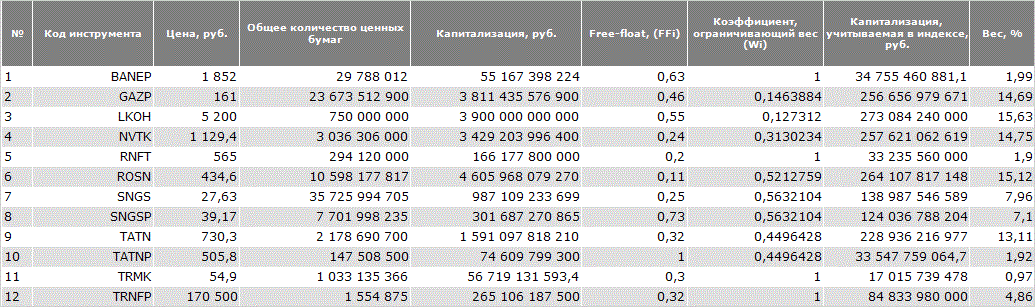

In [4]:
t=iis.download_image(r'https://informer.moex.com/ru/index/constituents-MICEXO&G-20190111.gif')  
t

In [ ]:
k[-3]

In [5]:
k=iis.industry_indices_list(t)
k

[<PIL.Image.Image image mode=P size=113x20 at 0x1F85F0233C8>,
 <PIL.Image.Image image mode=P size=113x20 at 0x1F85F023668>,
 <PIL.Image.Image image mode=P size=113x20 at 0x1F85EFF0EB8>,
 <PIL.Image.Image image mode=P size=113x20 at 0x1F85EFF0EF0>,
 <PIL.Image.Image image mode=P size=113x20 at 0x1F85F3E3DA0>,
 <PIL.Image.Image image mode=P size=113x20 at 0x1F85F3E3E10>,
 <PIL.Image.Image image mode=P size=113x20 at 0x1F85F3E3DD8>,
 <PIL.Image.Image image mode=P size=113x20 at 0x1F85F3E50F0>,
 <PIL.Image.Image image mode=P size=113x20 at 0x1F85F3E52E8>,
 <PIL.Image.Image image mode=P size=113x20 at 0x1F85F3E5438>,
 <PIL.Image.Image image mode=P size=113x20 at 0x1F85F3E5400>,
 <PIL.Image.Image image mode=P size=113x20 at 0x1F85F06A7F0>]

In [ ]:
    def recognize_text(self,img):
        file = BytesIO()
        img_converted = img.filter(ImageFilter.MedianFilter())
        enhancer = ImageEnhance.Contrast(img_converted)
        img_converted=enhancer.enhance(2)
        
        img_converted=img_converted.convert('1')
        img_converted.save(file, 'png')
        img_converted= Image.open(file)
        return image_to_string(img_converted,lang='eng')

In [ ]:
from PIL import Image, ImageEnhance, ImageFilter

im = Image.open("temp.jpg") # the second one 
im = im.filter(ImageFilter.MedianFilter())
enhancer = ImageEnhance.Contrast(im)

im = enhancer.enhance(2)
im = im.convert('1')
im.save('temp2.jpg')
text = pytesseract.image_to_string(Image.open('temp2.jpg'))
print(text)

In [38]:
k[-5].convert('1')

In [6]:
[iis.recognize_text(el)   for el in k ]

NameError: name 'PIL' is not defined

In [86]:
kk=k[3].crop((100,0,113,20))
kk.convert('1').resize((200,200))

In [66]:
k[3]

In [43]:

img=k[-5].convert('RGB')
k[-5].convert('1')

In [40]:
img=img.filter(ImageFilter.SHARPEN)

img.convert('1')

In [91]:
    def recognize_text(img):
        file = BytesIO()
        img_converted=img.convert('1').resize((200,200))
        img_converted.save(file, 'png')
        img_converted= Image.open(file)
        return image_to_string(img_converted,lang='rus')
recognize_text(kk)

''

In [31]:
enhancer = ImageEnhance.Contrast(img)
img_converted=enhancer.enhance(11)
img_converted.convert('1')

In [ ]:
from pytesseract import image_to_string
from PIL import Image,ImageEnhance,ImageFilter
from io import BytesIO
def recognize_text(img):
    file = BytesIO()
    img=img.convert('RGB')
    img=ImageEnhance.Sharpness (img.convert('RGB'))
    img_converted = img.filter(ImageFilter.MedianFilter())
    enhancer = ImageEnhance.Contrast(img_converted)
    img_converted=enhancer.enhance(2)
    
    img_converted=img_converted.convert('1')
    img_converted.save(file, 'png')
    img_converted= Image.open(file)
    return image_to_string(img_converted,lang='eng')

In [17]:
[recognize_text(el)   for el in k ]

['um: w', '(“ms', 'mm', '', 'mx', 'mo', '', '<Mm>', 'mm', 'mam', 'mm', 'mu :‘']

In [ ]:
pytesseract.image_to_string(k[-1],lang='eng')

In [ ]:
type(k[1]),type(m),type(m1)

In [ ]:
m=k[-1].convert('1')

In [ ]:
l=k[-1].convert('RGB')

In [ ]:
pytesseract.image_to_string(m1,lang='eng')

In [ ]:
m.save('result.png')

In [ ]:
m1= Image.open("result.png")

In [ ]:
m

In [ ]:
pytesseract.image_to_string(m2,lang='eng')

In [ ]:
m

In [ ]:
np.unique(np.array(m))

In [ ]:
Image.fromarray(np.array(m))

In [ ]:
from io import BytesIO


In [ ]:
import psycopg2

In [ ]:
conn = psycopg2.connect(host="localhost",database="postgres", user="postgres", password="admin")

In [ ]:
# create a cursor
cur = conn.cursor()
cur.execute('SELECT version()')

In [ ]:
db_version = cur.fetchone()
db_version

In [ ]:
db_version

In [ ]:
cur.close()